<a href="https://colab.research.google.com/github/haroldosfilho/Python/blob/master/Trabalho1grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Opções Disponíveis:
1 - Carregar um grafo
2 - Criar um grafo
3 - Sair
Escolha:
 1

Grafos na memória:
passeio5.npy
Informe o nome do grafo a ser carregado(sem extensão)!
passeio5
[[0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0.]]
Figura.


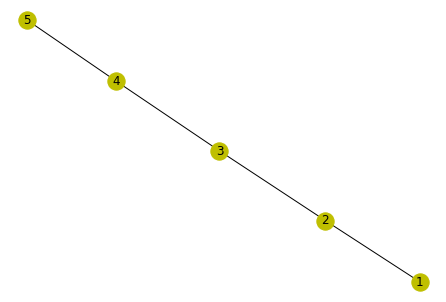

Opções Disponíveis:
1 - Carregar um grafo
2 - Criar um grafo
3 - Sair
Escolha:
 2
Informe nome do grafo(sem extensão)!
house5
Digite o número de vértices:
5
Informe os elementos da matriz triangular superior da matriz de adjacência do Grafo:

1 = Há aresta
0 = Não há aresta entre os vertices

Insira o elemento [1][2] da matriz:
1
Insira o elemento [1][3] da matriz:
1
Insira o elemento [1][4] da matriz:
0
Insira o elemento [1][5] da matriz:
1
Insira o elemento [2][3] da matriz:
1
Insira o elemento [2][4] da matriz:
0
Insira o elemento [2][5] da matriz:
0
Insira o elemento [3][4] da matriz:
1
Insira o elemento [3][5] da matriz:
0
Insira o elemento [4][5] da matriz:
1
Matriz de Adjacência
0.0  1.0  1.0  0.0  1.0
1.0  0.0  1.0  0.0  0.0
1.0  1.0  0.0  1.0  0.0
0.0  0.0  1.0  0.0  1.0
1.0  0.0  0.0  1.0  0.0


Figura


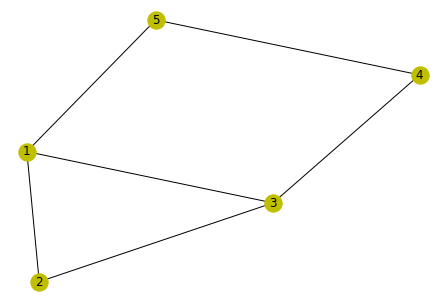

Opções Disponíveis:
1 - Carregar um grafo
2 - Criar um grafo
3 - Sair
Escolha:
 3


In [ ]:


import numpy
#NetworkX é um pacote Python utilizado para manipulação de grafos
import networkx as nx
import matplotlib.pyplot as plt 

from numpy import save
from numpy import load
#o módulo glob é usado para recuperar arquivos / nomes de caminhos que correspondam a um padrão especificado
import glob, os

def grafosnamemoria():
  print("\nGrafos na memória:")
  for file in glob.glob("*.npy"):
      print(file)

def matriztriangular(graf, n):
    for i in range(1, n):
        for j in range(i+1):
            graf[i, j] = graf[j, i]

def desenhagrafo(adjacent, N):
    G = nx.Graph() 
    for i in range(N): 
        for j in range(N): 
            if adjacent[i][j] == 1: 
                G.add_edge(i+1,j+1)  
    
    opts = { "with_labels": True, "node_color": 'y' }
    nx.draw(G, **opts)

    plt.show()        


def imprimematriz(graf, N):   
    for i in range(N):
        for j in range(N):
            print(graf[i][j], end = " ")
        print()
    print()

def grafoexistente(fileName):
  return os.path.isfile(fileName)

def elementosdamatrizsimetrica(graf, N):   
    # carrega elementos da matriz acima da diagonal principal
    print("1 = Há aresta\n0 = Não há aresta entre os vertices\n")
    for i in range(N):  # linhas
        for j in range(N):  # colunas
            if i<j:              
              graf[i][j] = int(input("Insira o elemento [{}][{}] da matriz:\n".format(i+1, j+1)))
def subMenucarregagrafo():
    grafosnamemoria()
    nomeGrafo = input("Informe o nome do grafo a ser carregado(sem extensão)!\n")
    data = load(nomeGrafo+'.npy')
    print(data)
    print("Figura.")
    desenhagrafo(data, len(data))

def subMenuCriagrafo():

    numgrafo = 0
    while True:
      if numgrafo == 0:
          nomeGrafo = input("Informe nome do grafo(sem extensão)!\n")
      else:
          nomeGrafo = input("Nome já foi usado. Informe um nome para o grafo(sem extensão)!\n")
      numgrafo = numgrafo + 1
      if not grafoexistente(nomeGrafo+'.npy'):
        break

    N = int(input("Digite o número de vértices:\n"))
    graf = numpy.zeros((N, N))
    print("Informe os elementos da matriz triangular superior da matriz de adjacência do Grafo:\n") 
    elementosdamatrizsimetrica(graf, N)
    matriztriangular(graf, N)     
    save(nomeGrafo+'.npy', graf)
    print("Matriz de Adjacência")
    for line in graf:
      print ('  '.join(map(str, line))) 
    print()   
    print()
    print("Figura")         

    desenhagrafo(graf, N)    

def menu():
    opcao=int(input('''Opções Disponíveis:\n1 - Carregar um grafo\n2 - Criar um grafo\n3 - Sair\nEscolha:\n '''))
    if opcao == 1:
        subMenucarregagrafo()
    elif opcao == 2:
        subMenuCriagrafo()
    elif opcao == 3:
        exit()
    else:
        print("Opção errada, digite: 1,2 ou 3\n")
        menu()
    return opcao    

controlelaço = True
while (controlelaço):
    if menu() == 3:
        controlelaço = False           